In [28]:
!pip install opencv-python
!pip install scikit-image

In [29]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from numpy.lib.stride_tricks import as_strided
import PIL
from pandas import DataFrame
import pandas as pd
from IPython.display import display, HTML
from skimage.exposure import rescale_intensity
import json
import os
from itertools import product
import itertools
import random
import glob
from pathlib import Path
from datetime import datetime
import datetime
from matplotlib.colors import Normalize


def set_axis(x, no_labels = 7)->tuple[np.array, np.array]:
    """Sets the x-axis positions and labels for a plot.

    Args:
        x (np.array): The x-axis data.
        no_labels (int, optional): The number of labels to display. Defaults to 7.

    Returns:
        tuple[np.array, np.array]: A tuple containing:
            - The positions of the labels on the x-axis.
            - The labels themselves.
    """
    nx = x.shape[0]
    step_x = int(nx / (no_labels - 1)) 
    x_positions = np.arange(0,nx,step_x) 
    x_labels = x[::step_x]
    return x_positions, x_labels

pd.options.display.html.border = 0
pd.options.display.float_format = '{:,.2f}'.format

In [30]:
if "google.colab" in str(get_ipython()):
    from google.colab.patches import cv2_imshow

    imshow = cv2_imshow
else:

    def imshow(img):
        img = img.clip(0, 255).astype("uint8")
        if img.ndim == 3:
            if img.shape[2] == 4:
                img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
            else:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        display(PIL.Image.fromarray(img))

In [31]:
def h_color(a, interpolation=None, size=None, fy=1.5, fx=1.5, cmap="gray"):
    s = [int(a.shape[0] * fy), int(a.shape[1] * fx)] if size is None else size
    plt.figure(figsize=s)
    plt.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        labelleft=False,
        left=False,
        right=False,
    )
    plt.imshow(a, cmap=cmap, interpolation=interpolation)

In [32]:
css = """
<style type="text/css">
  table, td, table.dataframe, table.dataframe td {
    border: 1px solid black;    //border: double;
    border-collapse: collapse;
    border-style: solid;
    border-spacing: 0px;
    background-color: rgb(250,250,250);
    width: 24px;
    height: 24px;
    text-align: center;
    transform: scale(1.0);
    margin: 5px;
    }
</style>
"""


def h(s):
    return display(HTML(css + DataFrame(s).to_html(header=False, index=False)))

In [33]:
def h_color_3d(z):
    fig = go.Figure(data=[go.Surface(z=z)])
    fig.update_layout(autosize=False, width=500, height=500)
    fig.show()

### **Load Data**

### 1st Range : 090422 - 090612

In [34]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '090422'
end = '090612'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [35]:
dx= 5.106500953873407 
dt= 0.0016

data1 = []
first_filename = selected[0]
for file in selected:
   data1.append(np.load(file))
data1 = np.concatenate(data1)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data1), freq=f'{dt}s')
columns = np.arange(len(data1[0])) * dx
df1 = pd.DataFrame(data=data1, index=index, columns=columns)

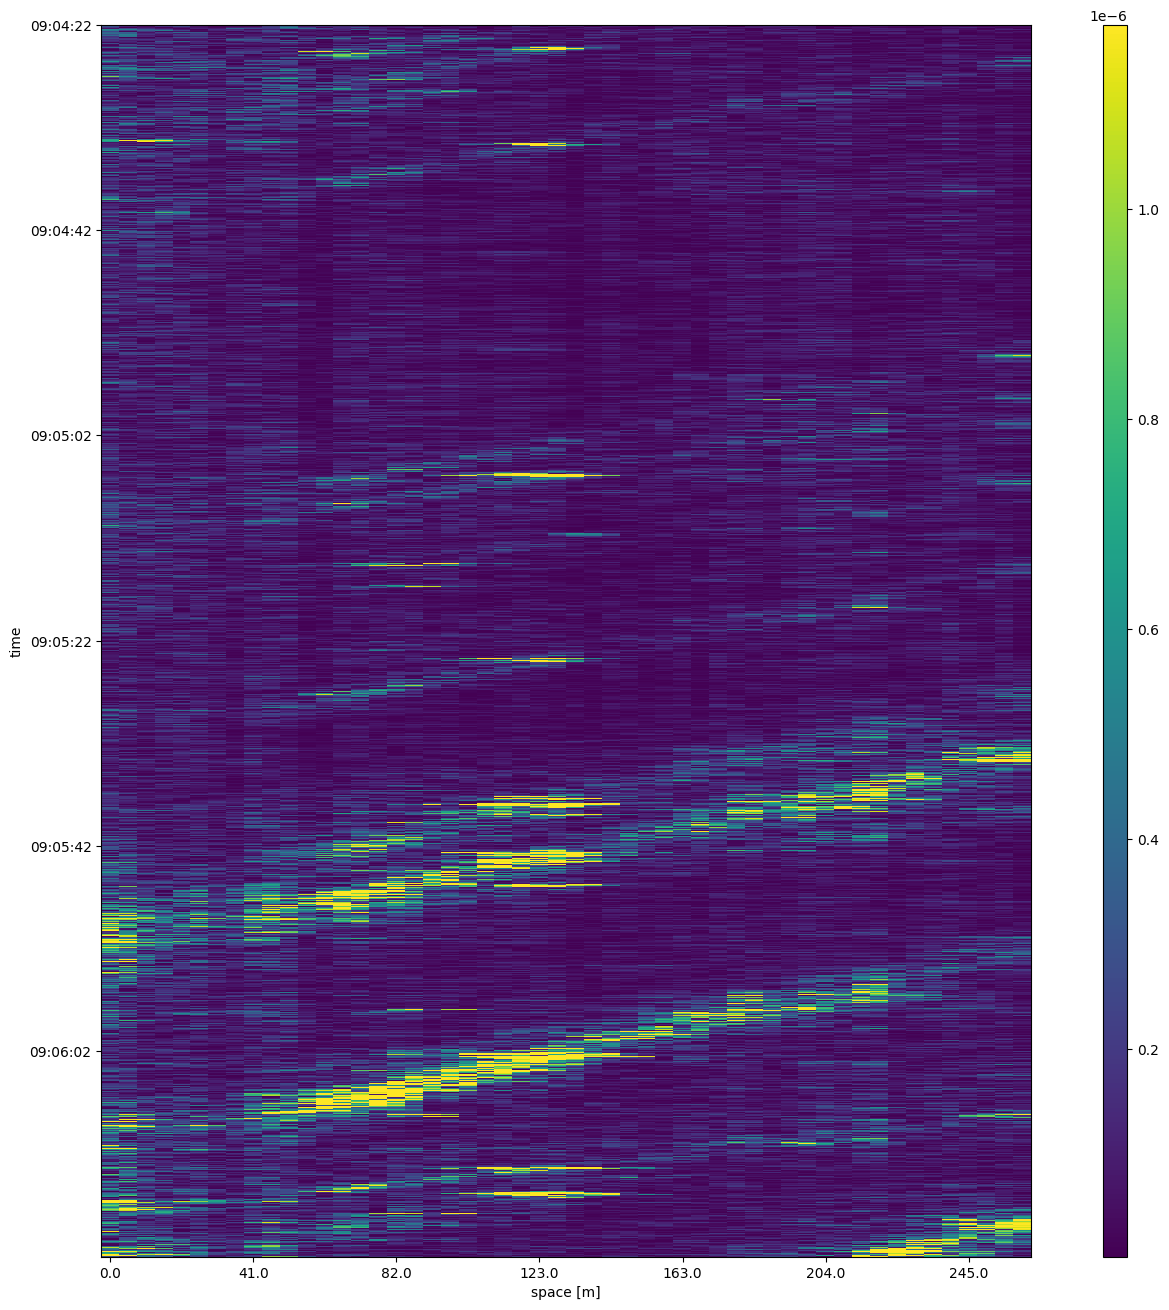

In [36]:


fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df1 -= df1.mean()
df1 = np.abs(df1) 
low, high = np.percentile(df1, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df1,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df1.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df1.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()


### 2nd Range : 091152 - 091342

In [37]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '091152'
end = '091342'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [38]:
data2 = []
first_filename = selected[0]
for file in selected:
   data2.append(np.load(file))
data2 = np.concatenate(data2)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data2), freq=f'{dt}s')
columns = np.arange(len(data2[0])) * dx
df2 = pd.DataFrame(data=data2, index=index, columns=columns)

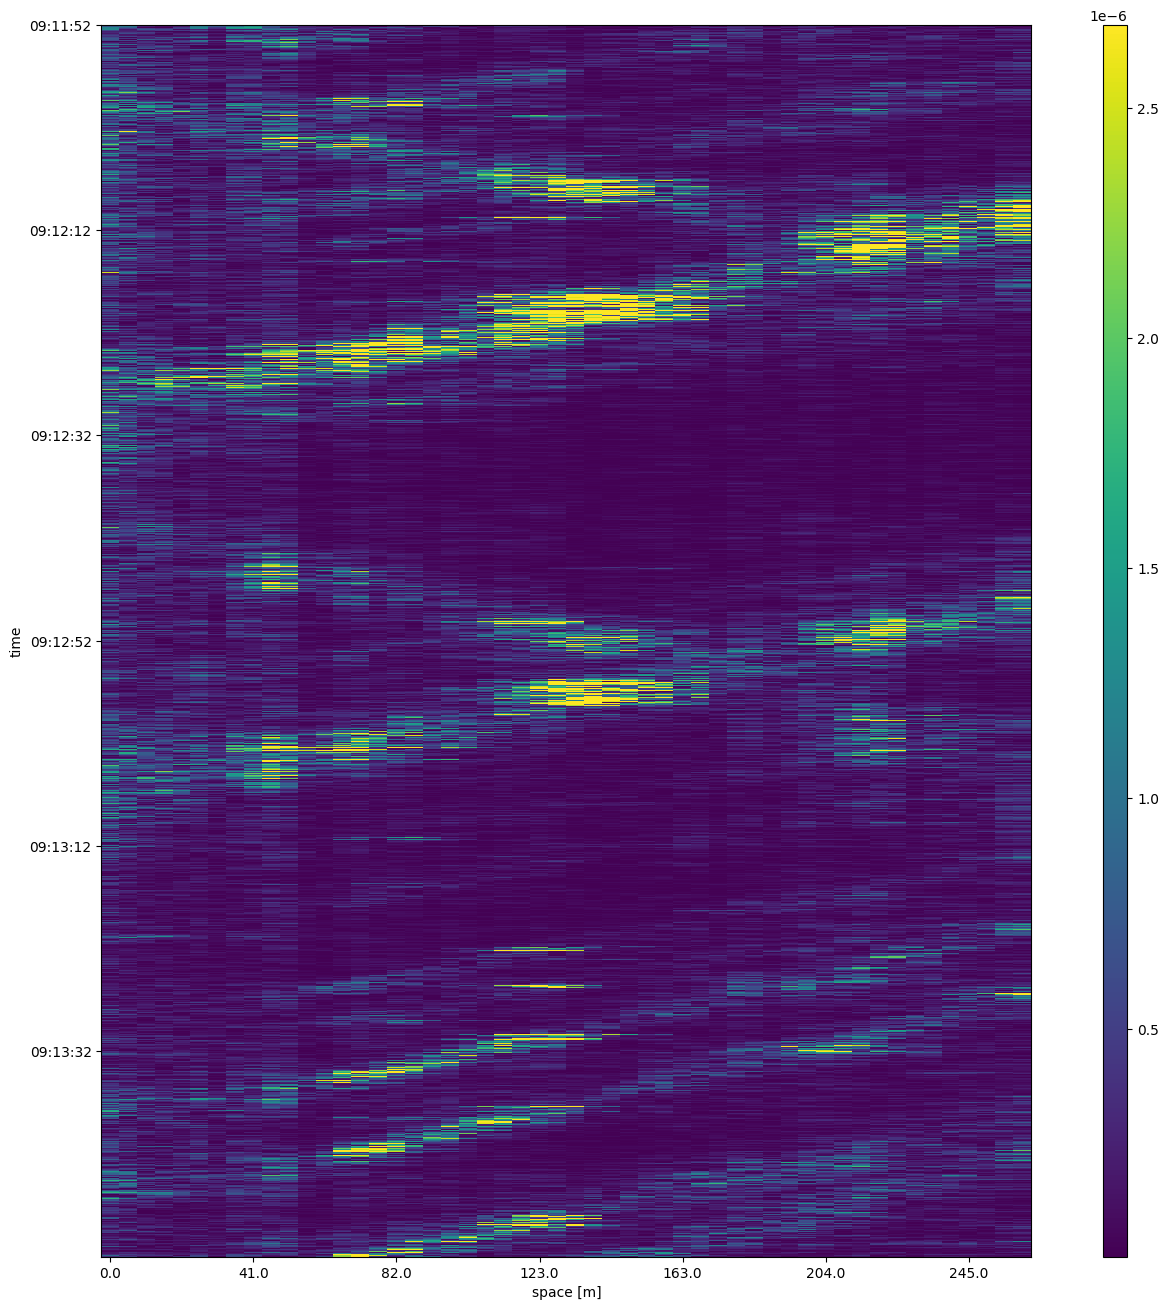

In [39]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df2 -= df2.mean()
df2 = np.abs(df2) 
low, high = np.percentile(df2, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df2,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df2.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df2.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()

### 3rd Range : 094122 - 094312

In [40]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '094122'
end = '094312'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [41]:
data3 = []
first_filename = selected[0]
for file in selected:
   data3.append(np.load(file))
data3 = np.concatenate(data3)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data3), freq=f'{dt}s')
columns = np.arange(len(data3[0])) * dx
df3 = pd.DataFrame(data=data3, index=index, columns=columns)

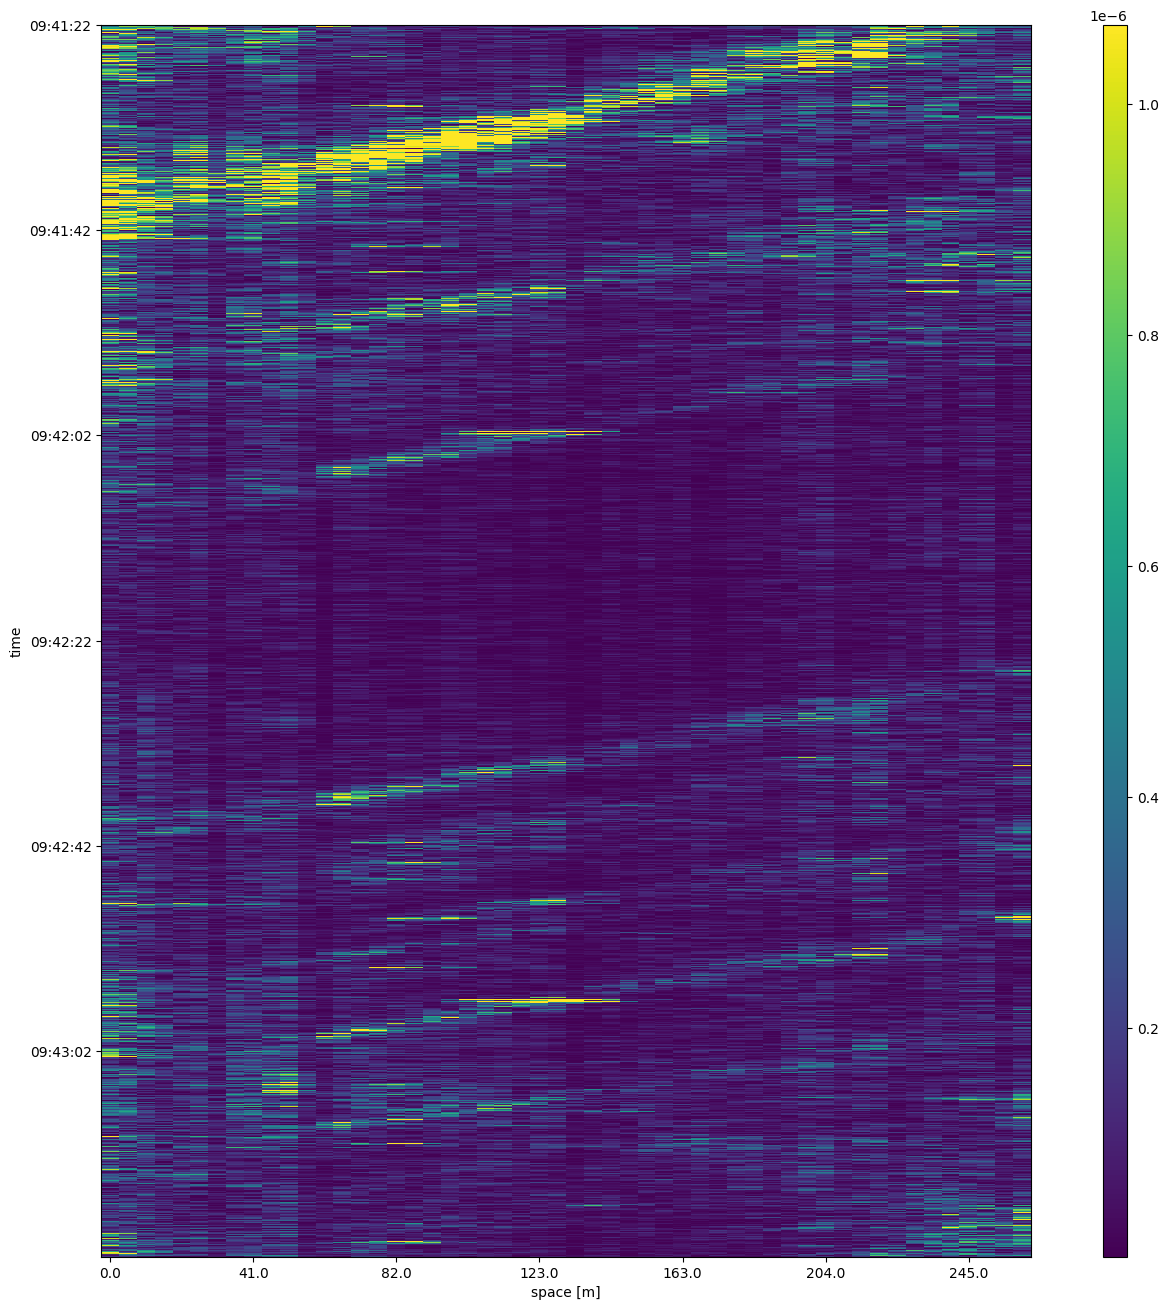

In [42]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df3 -= df3.mean()
df3 = np.abs(df3) 
low, high = np.percentile(df3, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df3,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df3.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df3.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()

### **Frequency Analysis (FFT)**

In [43]:
def perform_fft_analysis(df, range_name):
    """
    Perform FFT analysis on each spatial channel independently.
    
    Args:
        df: DataFrame with temporal data (rows) and spatial channels (columns)
        range_name: Name identifier for the range
    
    Returns:
        fft_result: FFT magnitude for each channel
        freqs: Frequency array
    """
    print(f"\n{'='*60}")
    print(f"FFT Analysis - {range_name}")
    print(f"{'='*60}")
    
    # Get data as numpy array
    data = df.values
    n_time, n_channels = data.shape
    
    print(f"Signal shape: {n_time} time samples × {n_channels} spatial channels")
    print(f"Sampling rate: {1/dt:.2f} Hz")
    print(f"Frequency resolution: {1/(n_time*dt):.6f} Hz")
    
    # Apply FFT to each channel independently
    fft_result = np.zeros((n_time//2, n_channels))
    
    for channel in range(n_channels):
        # Extract signal for this channel
        signal = data[:, channel]
        
        # Apply FFT
        fft_vals = np.fft.fft(signal)
        
        # Take only positive frequencies and compute magnitude
        fft_magnitude = np.abs(fft_vals[:n_time//2])
        
        # Store result
        fft_result[:, channel] = fft_magnitude
    
    # Frequency array (positive frequencies only)
    freqs = np.fft.fftfreq(n_time, d=dt)[:n_time//2]
    
    print(f"FFT result shape: {fft_result.shape}")
    print(f"Frequency range: {freqs[0]:.2f} Hz to {freqs[-1]:.2f} Hz")
    
    return fft_result, freqs

In [44]:
# Perform FFT analysis for all 3 ranges
fft1, freqs1 = perform_fft_analysis(df1, "Range 1 (090422-090612)")
fft2, freqs2 = perform_fft_analysis(df2, "Range 2 (091152-091342)")
fft3, freqs3 = perform_fft_analysis(df3, "Range 3 (094122-094312)")


FFT Analysis - Range 1 (090422-090612)
Signal shape: 75000 time samples × 52 spatial channels
Sampling rate: 625.00 Hz
Frequency resolution: 0.008333 Hz
FFT result shape: (37500, 52)
Frequency range: 0.00 Hz to 312.49 Hz

FFT Analysis - Range 2 (091152-091342)
Signal shape: 75000 time samples × 52 spatial channels
Sampling rate: 625.00 Hz
Frequency resolution: 0.008333 Hz
FFT result shape: (37500, 52)
Frequency range: 0.00 Hz to 312.49 Hz

FFT Analysis - Range 3 (094122-094312)
Signal shape: 75000 time samples × 52 spatial channels
Sampling rate: 625.00 Hz
Frequency resolution: 0.008333 Hz
FFT result shape: (37500, 52)
Frequency range: 0.00 Hz to 312.49 Hz


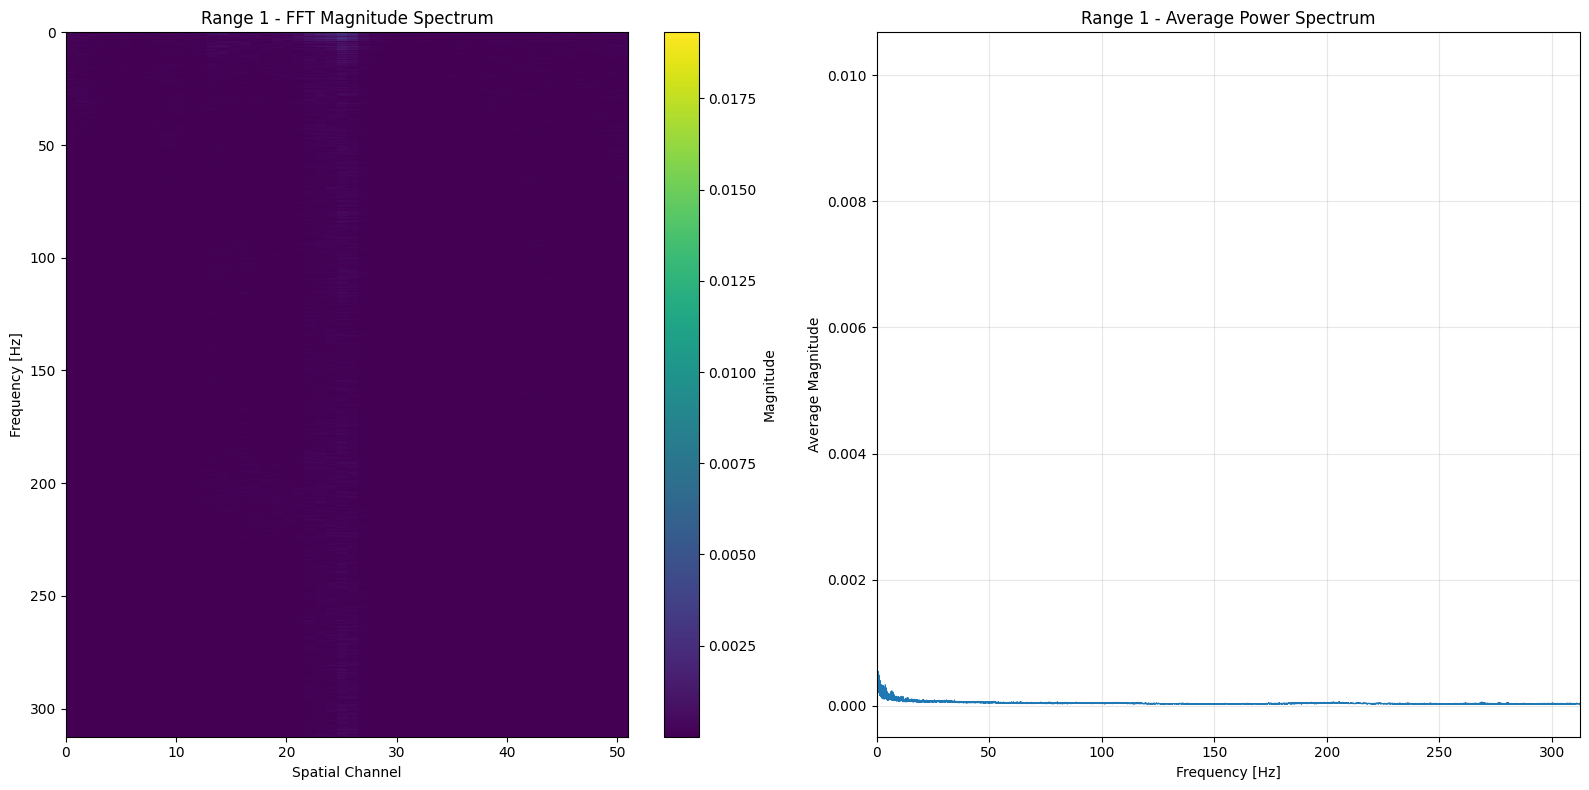

In [46]:
# Visualize FFT results for Range 1
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# FFT magnitude spectrum (frequency-space representation)
ax1 = axes[0]
im1 = ax1.imshow(fft1, aspect='auto', cmap='viridis', 
                 extent=[0, fft1.shape[1]-1, freqs1[-1], freqs1[0]], 
                 interpolation='none')
ax1.set_xlabel('Spatial Channel')
ax1.set_ylabel('Frequency [Hz]')
ax1.set_title('Range 1 - FFT Magnitude Spectrum')
plt.colorbar(im1, ax=ax1, label='Magnitude')

# Average power spectrum across all channels
ax2 = axes[1]
avg_spectrum = np.mean(fft1, axis=1)
ax2.plot(freqs1, avg_spectrum, linewidth=0.5)
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Average Magnitude')
ax2.set_title('Range 1 - Average Power Spectrum')
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, freqs1[-1]])

plt.tight_layout()
plt.show()

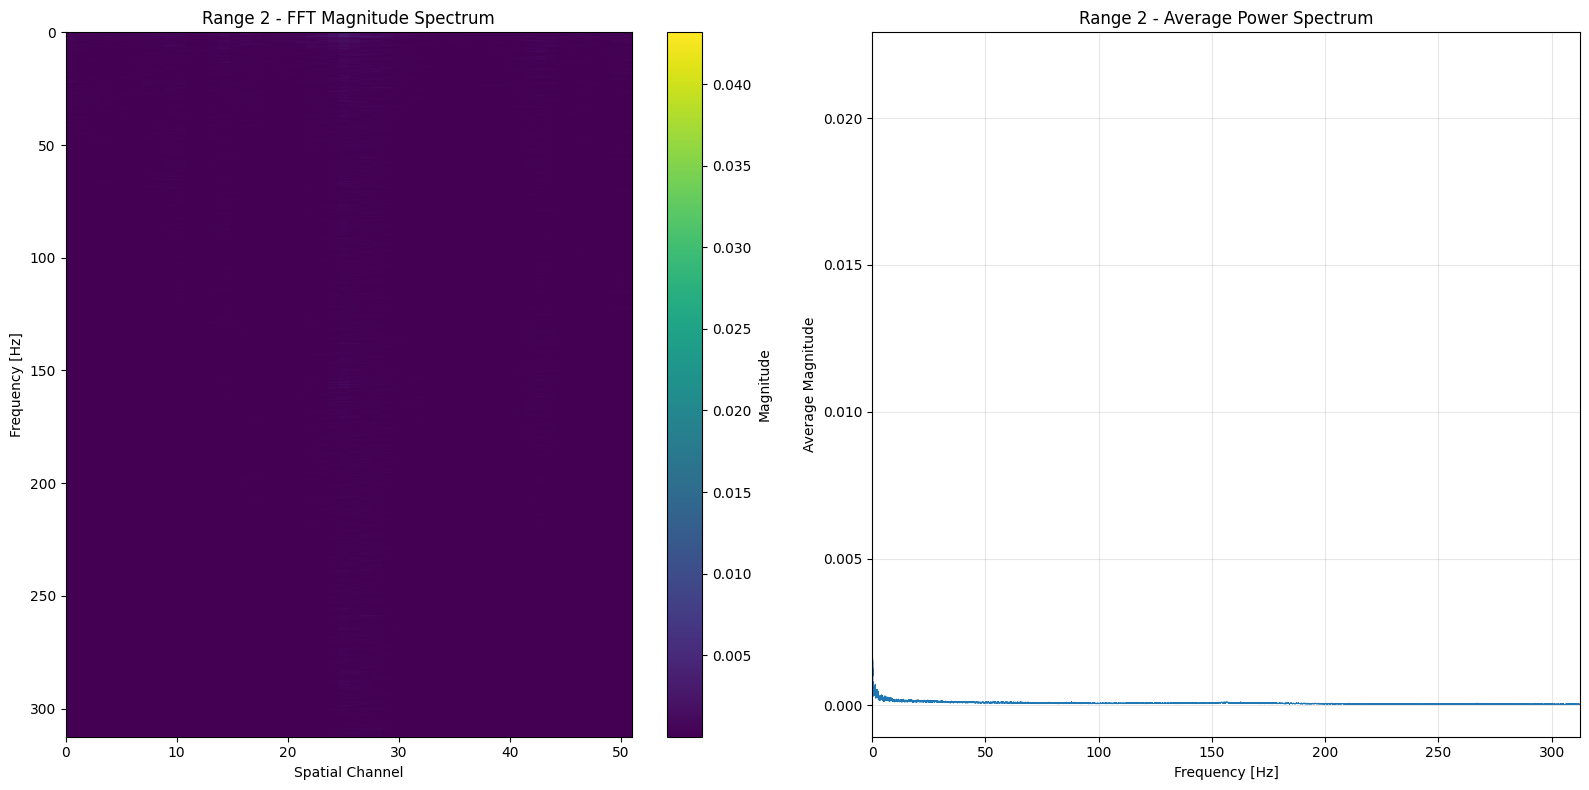

In [47]:
# Visualize FFT results for Range 2
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

ax1 = axes[0]
im1 = ax1.imshow(fft2, aspect='auto', cmap='viridis', 
                 extent=[0, fft2.shape[1]-1, freqs2[-1], freqs2[0]], 
                 interpolation='none')
ax1.set_xlabel('Spatial Channel')
ax1.set_ylabel('Frequency [Hz]')
ax1.set_title('Range 2 - FFT Magnitude Spectrum')
plt.colorbar(im1, ax=ax1, label='Magnitude')

ax2 = axes[1]
avg_spectrum = np.mean(fft2, axis=1)
ax2.plot(freqs2, avg_spectrum, linewidth=0.5)
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Average Magnitude')
ax2.set_title('Range 2 - Average Power Spectrum')
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, freqs2[-1]])

plt.tight_layout()
plt.show()

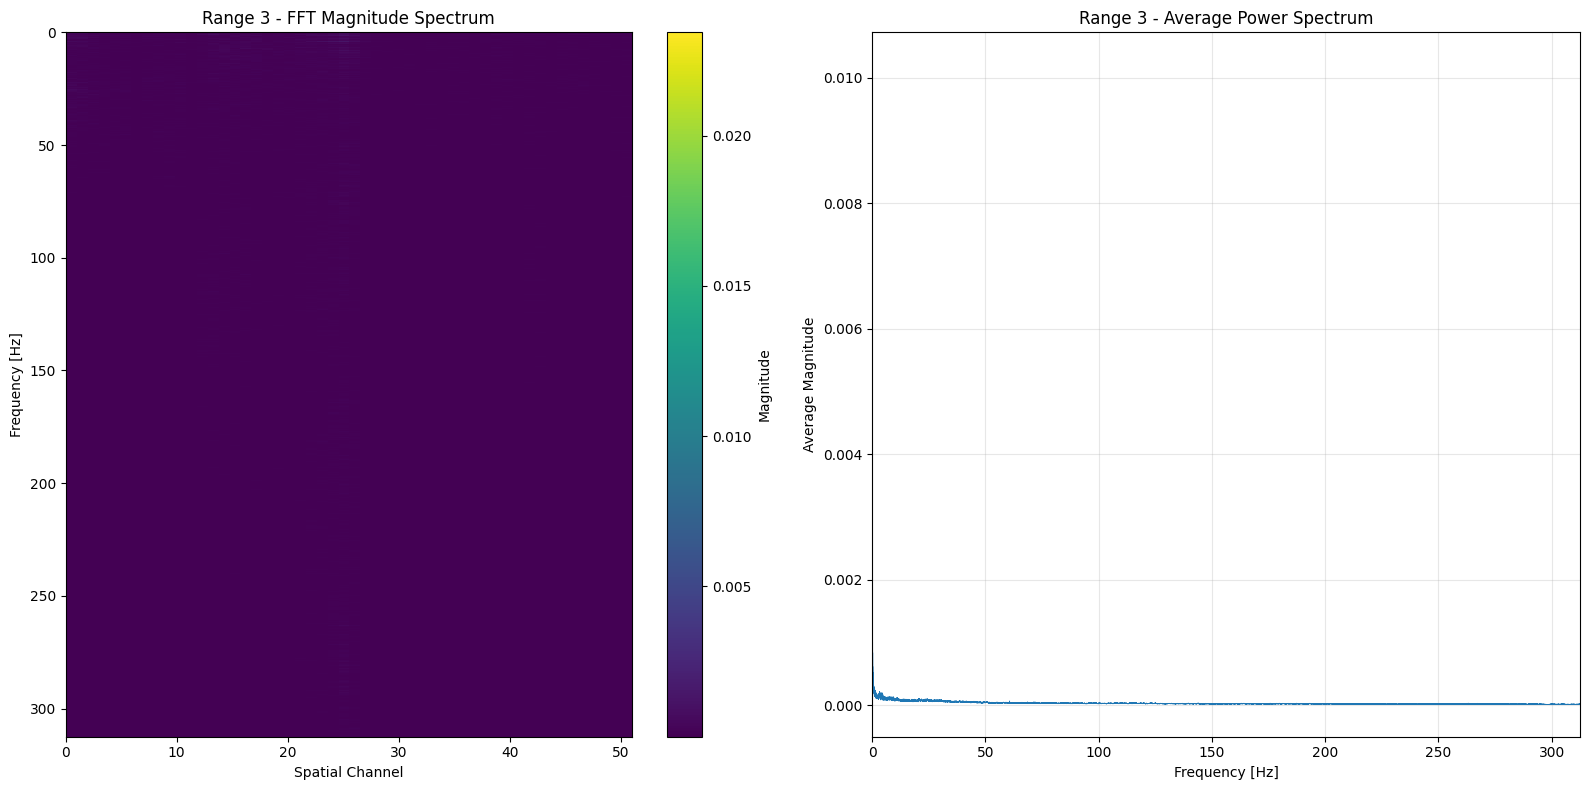

In [48]:
# Visualize FFT results for Range 3
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

ax1 = axes[0]
im1 = ax1.imshow(fft3, aspect='auto', cmap='viridis', 
                 extent=[0, fft3.shape[1]-1, freqs3[-1], freqs3[0]], 
                 interpolation='none')
ax1.set_xlabel('Spatial Channel')
ax1.set_ylabel('Frequency [Hz]')
ax1.set_title('Range 3 - FFT Magnitude Spectrum')
plt.colorbar(im1, ax=ax1, label='Magnitude')

ax2 = axes[1]
avg_spectrum = np.mean(fft3, axis=1)
ax2.plot(freqs3, avg_spectrum, linewidth=0.5)
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Average Magnitude')
ax2.set_title('Range 3 - Average Power Spectrum')
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, freqs3[-1]])

plt.tight_layout()
plt.show()